In [1]:
import pandas as pd
import sqlite3 as sql # included as part of python standard library
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

In [2]:
# creating connection
conn  = sql.connect("Db-IMDB.db")

In [3]:
# Get list of all tables in the DB.
result = pd.read_sql_query("SELECT tbl_name FROM sqlite_master where type = 'table';", conn)
print(result)

      tbl_name
0        Movie
1        Genre
2     Language
3      Country
4     Location
5   M_Location
6    M_Country
7   M_Language
8      M_Genre
9       Person
10  M_Producer
11  M_Director
12      M_Cast


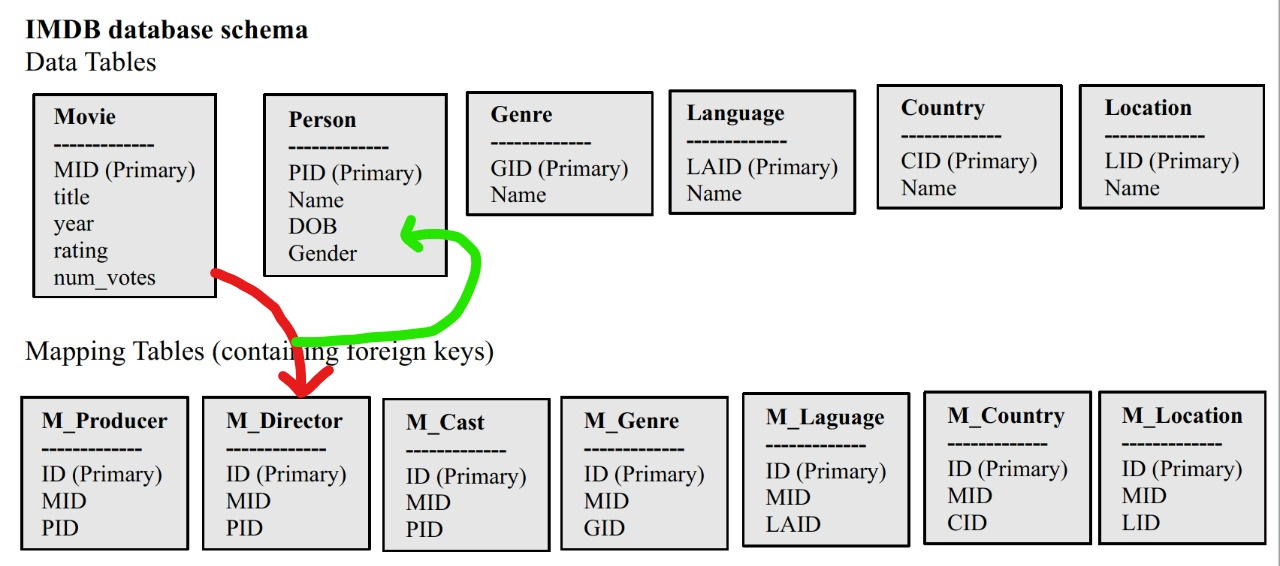

In [4]:
from IPython.display import Image
Image("img/ans_4.jpg",width=1200, height=300)

## Question :- 04 :: List all directors who directed 10 movies or more, in descending order of the number of movies they directed. Return the directors' names and the number of movies each of them directed?

### PART -01 :: FIRST TAKE OUT THOSE PID OF DIRECTORS WHOSE MOVIE COUNT IS >=10

In [5]:
part_1 = pd.read_sql_query(""" 
SELECT PID, COUNT(MID) MOVIE_DIRECTED FROM M_Director GROUP BY PID HAVING  MOVIE_DIRECTED>=10; 
""", conn)

In [6]:
part_1

,PID,MOVIE_DIRECTED
0,nm0004292,10
1,nm0004363,13
2,nm0007131,18
3,nm0007147,13
4,nm0007181,21
5,nm0025629,13
6,nm0052630,10
7,nm0062614,13
8,nm0063357,12
9,nm0070867,17


### PART -02 :: NOW  FIND OUT THE NAME OF DIRECTOR  WITH PART-01 PID BY JOIN IT WITH PERSON TABLE ON THE BASIS OF PID OF BOTH TABLE AND THEN ORDERING IT  IN DESC BY MOVIE COUNT.

In [7]:
part_2 = pd.read_sql_query(""" 
SELECT DISTINCT TRIM(p.NAME) DIRECTOR_NAME, MOVIE_DIRECTED NUMBER_OF_MOVIES_DIRECTED FROM \
(
SELECT PID, COUNT(MID) MOVIE_DIRECTED FROM M_Director GROUP BY PID HAVING  MOVIE_DIRECTED>=10 
) mpid_md JOIN PERSON p WHERE TRIM(p.PID)= TRIM(mpid_md.PID) ORDER BY MOVIE_DIRECTED DESC;

""", conn)

In [8]:
part_2

,DIRECTOR_NAME,NUMBER_OF_MOVIES_DIRECTED
0,David Dhawan,39
1,Mahesh Bhatt,35
2,Priyadarshan,30
3,Ram Gopal Varma,30
4,Vikram Bhatt,29
5,Hrishikesh Mukherjee,27
6,Yash Chopra,21
7,Basu Chatterjee,19
8,Shakti Samanta,19
9,Subhash Ghai,18


## ANOTHER WAY TO SOLVE THIS :- 'WITH' QUERY 

In [9]:
part_3 = pd.read_sql_query("""

WITH MOVIE_ID_DIRECTOR AS
    (
    SELECT PID, COUNT(MID) MOVIE_DIRECTED FROM M_Director GROUP BY PID HAVING  MOVIE_DIRECTED>=10 
    )
    SELECT DISTINCT TRIM(p.NAME) DIRECTOR_NAME, MOVIE_DIRECTED NUMBER_OF_MOVIES_DIRECTED \
    FROM MOVIE_ID_DIRECTOR mpid_md JOIN PERSON p \
    WHERE TRIM(p.PID)= TRIM(mpid_md.PID) ORDER BY MOVIE_DIRECTED DESC; 

""", conn)

In [10]:
part_3

,DIRECTOR_NAME,NUMBER_OF_MOVIES_DIRECTED
0,David Dhawan,39
1,Mahesh Bhatt,35
2,Priyadarshan,30
3,Ram Gopal Varma,30
4,Vikram Bhatt,29
5,Hrishikesh Mukherjee,27
6,Yash Chopra,21
7,Basu Chatterjee,19
8,Shakti Samanta,19
9,Subhash Ghai,18
